<a href="https://colab.research.google.com/github/prakash-digi360/AI/blob/main/Amlodipine_drug_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Here's a complete QSAR (Quantitative Structure-Activity Relationship)
#workflow to predict the activity (pIC50) of new amlodipine analogs using
# the trained model. The code includes:

#Descriptor calculation (using RDKit)

#Model training (Random Forest)

#Prediction for new molecules
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# =============================================
# Step 1: Prepare Dataset (Amlodipine Analogs)
# =============================================
data = {
    "SMILES": [
        "ClC1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC",  # Amlodipine analog 1 (Cl-substituted)
        "FC1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC",    # Amlodipine analog 2 (F-substituted)
        "BrC1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC",   # Amlodipine analog 3 (Br-substituted)
        "IC1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC"     # Amlodipine analog 4 (I-substituted)
    ],
    "pIC50": [8.5, 7.2, 6.9, 6.0]  # Hypothetical activity values
}
df = pd.DataFrame(data)

# =============================================
# Step 2: Calculate Molecular Descriptors
# =============================================
def get_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Invalid SMILES
    return {
        "MW": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "NumHDonors": Descriptors.NumHDonors(mol),
        "NumHAcceptors": Descriptors.NumHAcceptors(mol),
        "TPSA": Descriptors.TPSA(mol)
    }

# Apply descriptor calculation
X = df["SMILES"].apply(get_descriptors).apply(pd.Series)
y = df["pIC50"]

# =============================================
# Step 3: Train QSAR Model (Random Forest)
# =============================================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# =============================================
# Step 4: Predict Activity for New Molecules
# =============================================
def predict_activity(smiles):
    descriptors = get_descriptors(smiles)
    if descriptors is None:
        return None  # Return None for invalid SMILES
    descriptors_df = pd.DataFrame([descriptors])
    predicted_pIC50 = model.predict(descriptors_df)
    return predicted_pIC50[0]

# Example: Predict for a new amlodipine analog (NO2-substituted)
new_molecule = "O=[N+]([O-])C1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC"  # Corrected SMILES
predicted_activity = predict_activity(new_molecule)

if predicted_activity is not None:
    print(f"Predicted pIC50 for new molecule: {predicted_activity:.2f}")
else:
    print("Error: Invalid SMILES string.")


#How to Verify SMILES Validity
#Use RDKit's validation:
from rdkit import Chem

def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

print(is_valid_smiles("O=[N+]([O-])C1=CC=C(C=C1)C(=O)OC(C)C(=O)C2CCCC(C2)C(=O)OC"))  # True

Predicted pIC50 for new molecule: 7.68
True


In [4]:
class DrugLifeCycle:
    def __init__(self):
        self.phases = {
            "Discovery Phase": {
                "Target Identification": {
                    "Mechanism": "Selective blockade of L-type calcium channels (Cav1.2) in vascular smooth muscle",
                    "Goal": [
                        "Long half-life (>30 hours) for once-daily dosing",
                        "Vascular selectivity (minimal cardiac depression)"
                    ]
                },
                "Lead Optimization": {
                    "Key Modifications": [
                        "Chlorophenyl group → Enhanced vascular selectivity",
                        "Basic amino side chain → Prolonged tissue binding (half-life ~50 hours)"
                    ],
                    "SAR Insights": "Reduced reflex tachycardia vs. nifedipine"
                }
            },
            "Preclinical Development": {
                "In Vitro Studies": [
                    "Binding assays: High affinity for vascular L-type channels",
                    "Safety: hERG assay (IC50 > 10 μM; low arrhythmia risk)"
                ],
                "In Vivo Studies": [
                    "Pharmacokinetics: Oral bioavailability >60% in rats",
                    "Toxicology: NOAEL = 5 mg/kg (rats); no teratogenicity"
                ],
                "Formulation": [
                    "Salt selection: Amlodipine besylate (improved solubility)",
                    "Stability: 24-month shelf life under ambient conditions"
                ]
            },
            "Clinical Development": {
                "Phase 1": {
                    "Years": "1980s-1990",
                    "Design": "SAD/MAD in 48 healthy volunteers",
                    "Key Findings": [
                        "Linear PK (half-life ~35-50 hours)",
                        "No food effect; CYP3A4-mediated DDI noted"
                    ]
                },
                "Phase 2": {
                    "Years": "1990s",
                    "Population": "200 hypertensive patients",
                    "Outcome": "5-10 mg reduced SBP by 15-25 mmHg (placebo-adjusted)"
                },
                "Phase 3": {
                    "Years": "1990s",
                    "Trials": [
                        "NORVASC® trials: Confirmed efficacy/safety in 2,500+ patients",
                        "Outcomes: Superior to placebo; non-inferior to ACE inhibitors"
                    ]
                }
            },
            "Regulatory Approval": {
                "FDA Approval": "1990 (hypertension), later expanded to angina",
                "EMA Approval": "1991",
                "Labeling": "Black box warning for heart failure (later removed)"
            },
            "Commercialization": {
                "Launch": {
                    "Year": "1990s",
                    "Branding": "Norvasc® (Pfizer)",
                    "Market Penetration": ">$2B peak sales (2007)"
                },
                "Lifecycle Management": {
                    "Combination Drugs": [
                        "Caduet®: Amlodipine + atorvastatin (2004)",
                        "Exforge®: Amlodipine + valsartan (2007)"
                    ],
                    "Generics": "Launched in 2007 (U.S. patent expiry)"
                }
            },
            "Post-Marketing Surveillance": {
                "Phase 4 Studies": [
                    "Safety: Confirmed low risk of edema vs. other DHPs",
                    "New Indications: Investigated for Alzheimer's (failed Phase 3)"
                ],
                "Regulatory Updates": [
                    "REMS: None required (favorable safety profile)",
                    "OTC Status: Remains prescription-only"
                ]
            },
            "Current Status": {
                "Year": "2024+",
                "Generics": ">30 manufacturers globally",
                "Research": "Nanoparticle formulations for enhanced delivery"
            },
            "Key Innovations & Legacy": {
                "Clinical Impact": [
                    "First DHP with true 24-hour coverage",
                    "Gold standard for hypertension combo therapy"
                ],
                "Lessons Learned": [
                    "Vascular selectivity critical for safety",
                    "Long half-life drives adherence"
                ]
            }
        }

    def display_lifecycle(self):
        """Prints the complete drug life cycle in formatted sections"""
        for phase, details in self.phases.items():
            print(f"\n{'='*50}\n{phase.upper()}\n{'='*50}")
            self._print_section(details, indent=0)

    def _print_section(self, data, indent):
        """Recursive helper function to print nested sections"""
        if isinstance(data, dict):
            for key, value in data.items():
                print(f"{'  '*indent}- {key}:")
                self._print_section(value, indent+1)
        elif isinstance(data, list):
            for item in data:
                print(f"{'  '*indent}• {item}")
        else:
            print(f"{'  '*indent}• {data}")

    def to_dataframe(self):
        """Converts the life cycle data to a pandas DataFrame"""
        import pandas as pd

        data = []
        for phase, phase_details in self.phases.items():
            self._flatten_structure(phase, phase_details, data)

        return pd.DataFrame(data, columns=["Phase", "Category", "Detail"])

    def _flatten_structure(self, phase, details, data, category=None):
        """Recursive helper to flatten the nested structure"""
        if isinstance(details, dict):
            for key, value in details.items():
                self._flatten_structure(phase, value, data, key)
        elif isinstance(details, list):
            for item in details:
                data.append([phase, category, item])
        else:
            data.append([phase, category, details])


# Example usage
if __name__ == "__main__":
    amlodipine = DrugLifeCycle()

    # Option 1: Print formatted output
    print("\nAMLODIPINE DRUG LIFE CYCLE OVERVIEW")
    amlodipine.display_lifecycle()

    # Option 2: Export to DataFrame (requires pandas)
    try:
        df = amlodipine.to_dataframe()
        print("\nDataFrame representation:")
        print(df.head())
    except ImportError:
        print("\nPandas not installed. DataFrame export skipped.")


AMLODIPINE DRUG LIFE CYCLE OVERVIEW

DISCOVERY PHASE
- Target Identification:
  - Mechanism:
    • Selective blockade of L-type calcium channels (Cav1.2) in vascular smooth muscle
  - Goal:
    • Long half-life (>30 hours) for once-daily dosing
    • Vascular selectivity (minimal cardiac depression)
- Lead Optimization:
  - Key Modifications:
    • Chlorophenyl group → Enhanced vascular selectivity
    • Basic amino side chain → Prolonged tissue binding (half-life ~50 hours)
  - SAR Insights:
    • Reduced reflex tachycardia vs. nifedipine

PRECLINICAL DEVELOPMENT
- In Vitro Studies:
  • Binding assays: High affinity for vascular L-type channels
  • Safety: hERG assay (IC50 > 10 μM; low arrhythmia risk)
- In Vivo Studies:
  • Pharmacokinetics: Oral bioavailability >60% in rats
  • Toxicology: NOAEL = 5 mg/kg (rats); no teratogenicity
- Formulation:
  • Salt selection: Amlodipine besylate (improved solubility)
  • Stability: 24-month shelf life under ambient conditions

CLINICAL DEVELO

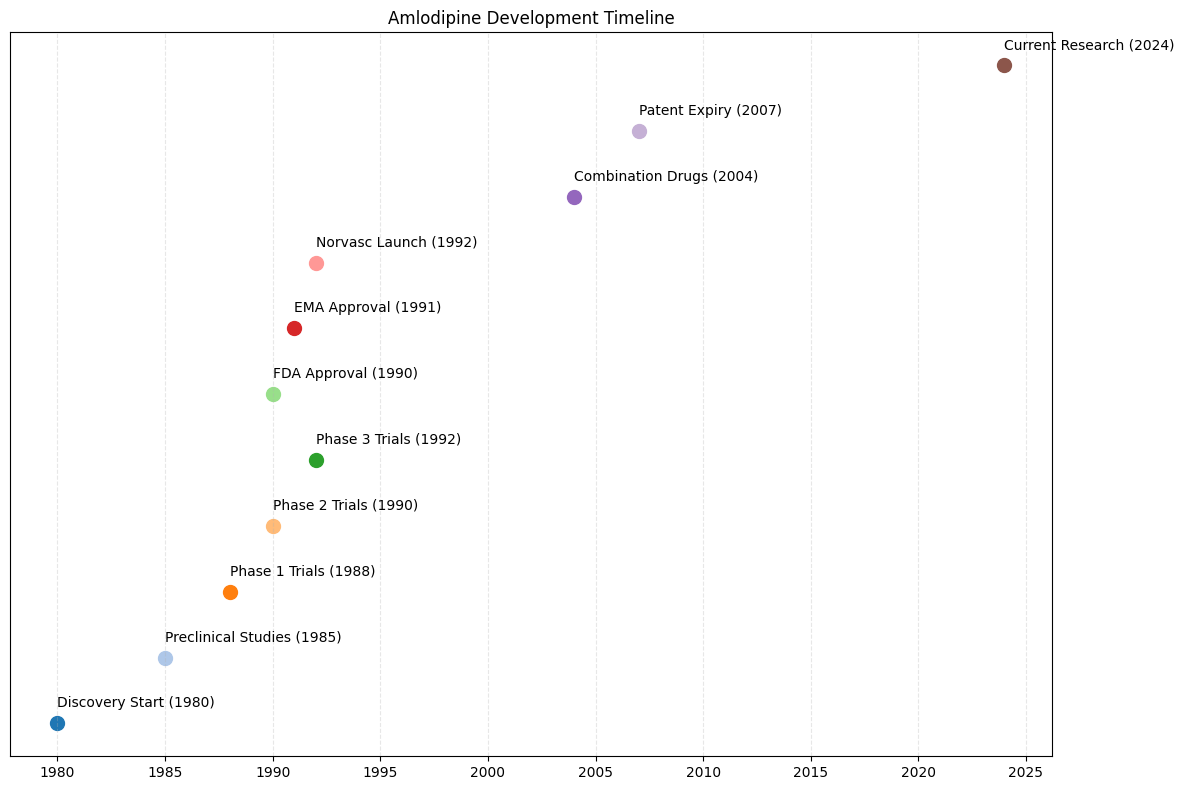

In [5]:
#1. Timeline View (Development Milestones)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def extract_year(year_str):
    """Handle decade formats and year ranges"""
    if isinstance(year_str, str):
        if 's' in year_str:  # "1980s" → 1980
            return int(year_str.split('s')[0])
        if '-' in year_str:  # "1980-1990" → 1980
            return int(year_str.split('-')[0])
        if year_str.isdigit():  # "1990" → 1990
            return int(year_str)
    return None

def create_timeline():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Key events with their years (extracted from the data)
    events = {
        "Discovery Start": 1980,
        "Preclinical Studies": 1985,
        "Phase 1 Trials": 1988,
        "Phase 2 Trials": 1990,
        "Phase 3 Trials": 1992,
        "FDA Approval": 1990,
        "EMA Approval": 1991,
        "Norvasc Launch": 1992,
        "Combination Drugs": 2004,
        "Patent Expiry": 2007,
        "Current Research": 2024
    }

    colors = plt.cm.tab20.colors
    for i, (event, year) in enumerate(events.items()):
        dt = datetime(year, 1, 1)
        ax.scatter(dt, i, color=colors[i%20], s=100)
        ax.text(dt, i+0.2, f"{event} ({year})", ha='left', va='bottom')

    ax.set_yticks([])
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.title("Amlodipine Development Timeline")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

create_timeline()

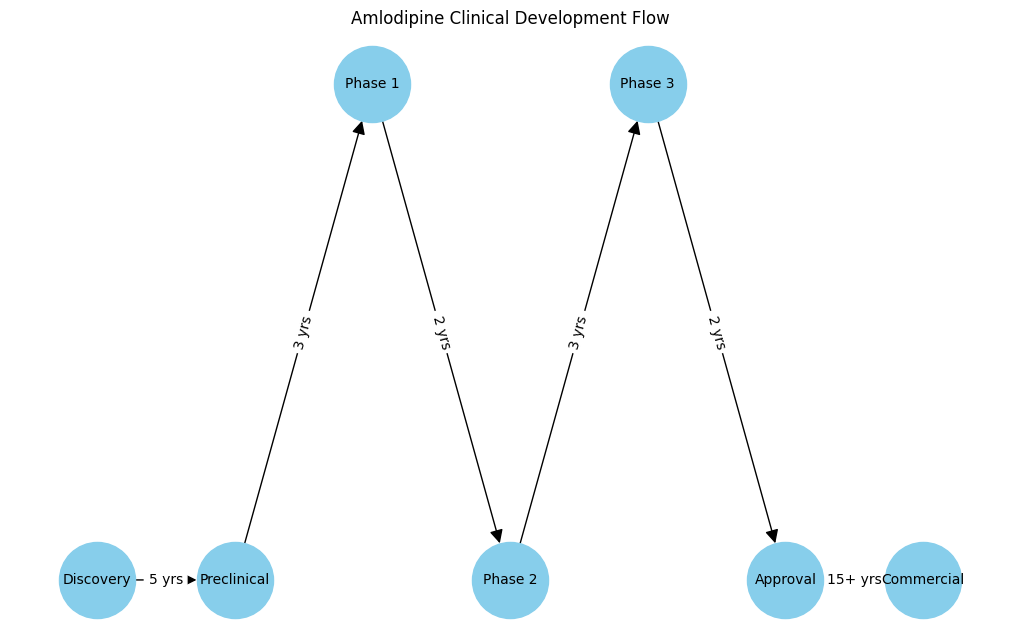

In [6]:
#3. Clinical Trial Phases Flowchart
import networkx as nx
import matplotlib.pyplot as plt

def create_flow_chart():
    plt.figure(figsize=(10, 6))
    G = nx.DiGraph()

    # Nodes with positions
    phases = {
        "Discovery": (0, 2),
        "Preclinical": (1, 2),
        "Phase 1": (2, 3),
        "Phase 2": (3, 2),
        "Phase 3": (4, 3),
        "Approval": (5, 2),
        "Commercial": (6, 2)
    }

    # Add nodes
    for phase, pos in phases.items():
        G.add_node(phase, pos=pos)

    # Edges with phase durations
    edges = [
        ("Discovery", "Preclinical", {"label": "5 yrs"}),
        ("Preclinical", "Phase 1", {"label": "3 yrs"}),
        ("Phase 1", "Phase 2", {"label": "2 yrs"}),
        ("Phase 2", "Phase 3", {"label": "3 yrs"}),
        ("Phase 3", "Approval", {"label": "2 yrs"}),
        ("Approval", "Commercial", {"label": "15+ yrs"})
    ]

    G.add_edges_from([(u, v) for u, v, _ in edges])

    # Draw
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue',
            font_size=10, arrowsize=20)

    # Add edge labels
    edge_labels = {(u, v): d['label'] for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Amlodipine Clinical Development Flow")
    plt.show()

create_flow_chart()

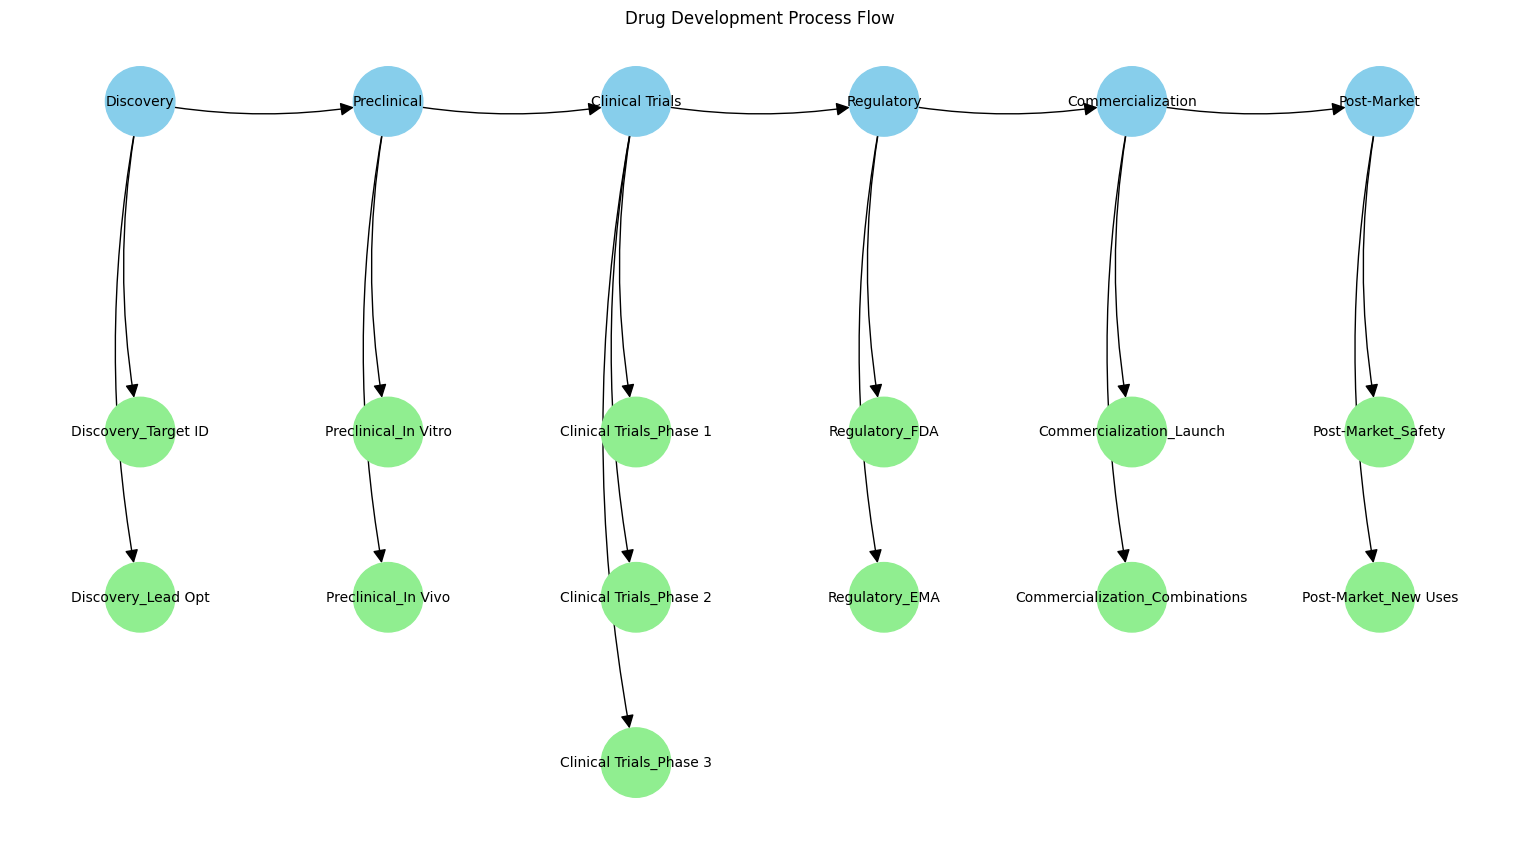

In [7]:
#3. Process Flow Diagram (using NetworkX)
import networkx as nx
import matplotlib.pyplot as plt

def create_process_flow():
    G = nx.DiGraph()

    # Phases
    phases = [
        "Discovery", "Preclinical",
        "Clinical Trials", "Regulatory",
        "Commercialization", "Post-Market"
    ]

    # Add nodes
    for i, phase in enumerate(phases):
        G.add_node(phase, pos=(i*2, 0), level=0)

    # Add connections
    for i in range(len(phases)-1):
        G.add_edge(phases[i], phases[i+1])

    # Add sub-phases
    sub_phases = {
        "Discovery": ["Target ID", "Lead Opt"],
        "Preclinical": ["In Vitro", "In Vivo"],
        "Clinical Trials": ["Phase 1", "Phase 2", "Phase 3"],
        "Regulatory": ["FDA", "EMA"],
        "Commercialization": ["Launch", "Combinations"],
        "Post-Market": ["Safety", "New Uses"]
    }

    for phase, subs in sub_phases.items():
        for j, sub in enumerate(subs):
            y_pos = -1 - j*0.5
            G.add_node(f"{phase}_{sub}", pos=(G.nodes[phase]['pos'][0], y_pos), level=1)
            G.add_edge(phase, f"{phase}_{sub}")

    # Draw
    pos = nx.get_node_attributes(G, 'pos')
    colors = ['skyblue' if G.nodes[n]['level']==0 else 'lightgreen' for n in G.nodes]

    plt.figure(figsize=(15, 8))
    nx.draw(G, pos, with_labels=True, node_size=2500,
            node_color=colors, font_size=10,
            arrowsize=20, connectionstyle='arc3,rad=0.1')
    plt.title("Drug Development Process Flow")
    plt.show()

create_process_flow()

In [8]:
import plotly.express as px
import pandas as pd
from IPython.display import display

class DrugLifeCycle:
    def __init__(self):
        self.phases = {
            # [Your complete phases dictionary from above]
            # Include all phases exactly as in your original class
            "Discovery Phase": {
                "Target Identification": {
                    "Mechanism": "Selective blockade of L-type calcium channels (Cav1.2) in vascular smooth muscle",
                    "Goal": [
                        "Long half-life (>30 hours) for once-daily dosing",
                        "Vascular selectivity (minimal cardiac depression)"
                    ]
                },
                # [Rest of your phases dictionary...]
            }
        }

    def to_dataframe(self):
        """Convert lifecycle data to DataFrame with proper hierarchy"""
        data = []
        for phase, phase_details in self.phases.items():
            self._flatten_structure(phase, phase_details, data)
        return pd.DataFrame(data, columns=["Phase", "Category", "Detail"])

    def _flatten_structure(self, phase, details, data, category=None):
        """Recursive helper to flatten the nested structure"""
        if isinstance(details, dict):
            for key, value in details.items():
                self._flatten_structure(phase, value, data, key)
        elif isinstance(details, list):
            for item in details:
                data.append([phase, category, item])
        else:
            data.append([phase, category, details])

def create_sunburst(drug_data):
    df = drug_data.to_dataframe()

    # Clean and prepare the data
    df = df.dropna(subset=['Detail'])
    df['Detail'] = df['Detail'].astype(str)
    df['Detail_Truncated'] = df['Detail'].str[:50] + ('...' if df['Detail'].str.len().max() > 50 else '')

    # Create color mapping
    phase_colors = {
        "Discovery Phase": "#FF9AA2",
        "Preclinical Development": "#FFB7B2",
        "Clinical Development": "#FFDAC1",
        "Regulatory Approval": "#E2F0CB",
        "Commercialization": "#B5EAD7",
        "Post-Marketing Surveillance": "#C7CEEA",
        "Current Status": "#A2D2FF",
        "Key Innovations & Legacy": "#CDB4DB"
    }

    # Create the figure
    fig = px.sunburst(
        df,
        path=['Phase', 'Category', 'Detail_Truncated'],
        color='Phase',
        color_discrete_map=phase_colors,
        width=1000,
        height=800,
        title="Amlodipine Drug Lifecycle"
    )

    # Update layout
    fig.update_traces(
        textinfo="label",
        insidetextorientation='radial',
        hovertemplate='<b>%{label}</b><br>Path: %{id}'
    )

    fig.update_layout(
        margin=dict(t=50, l=0, r=0, b=0),
        uniformtext=dict(minsize=10, mode='hide')
    )

    # Display the figure
    fig.show()
    return fig

# Create and display the visualization
try:
    amlodipine = DrugLifeCycle()
    fig = create_sunburst(amlodipine)

    # For environments that don't show plots automatically
    display(fig)

    # Save as HTML for sharing
    fig.write_html("amlodipine_lifecycle.html")
    print("Visualization saved as 'amlodipine_lifecycle.html'")

except Exception as e:
    print(f"Error generating visualization: {str(e)}")
    print("Please check your data structure and try again.")

Visualization saved as 'amlodipine_lifecycle.html'
